In [1]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
import sympy as sp
import scipy.integrate as scint
import scipy.optimize as sciopt
sp.init_printing()

# D.1 Modelos de integración y disparo

### D.1.1 Solución general del modelo lineal con $I(t) = I_0$

In [2]:
#Definición de funciones y constantes
u = sp.Function('u')
I0, u0, tau, R, t, ur = sp.symbols('I_0 u_0 τ R t u_{rest}')
C1 = sp.symbols('C1')

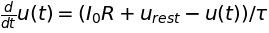

In [3]:
#Ecuación diferencial con I0
diff_eq = sp.Eq(u(t).diff(), (R*I0 + ur - u(t))/tau)
diff_eq

In [4]:
#Solución mediante los métodos de sympy
solG = sp.dsolve(diff_eq)
solG

In [5]:
#Obtención de la condición inicial
eq_ci = sp.Eq(u0, solG.rhs.subs(t, 0)) 
eq_ci

In [6]:
#Se resuelve el valor de C1 expresado en función de u0 y se sustituye en la solución general para eliminar C1
solG = solG.subs(C1, sp.solve(eq_ci, C1)[0])
solG

In [7]:
#Se puede finalmente considerar un "cambio de ejes" del potencial donde u_rest = 0 en vez de -65
solG = solG.subs(ur, 0)
solG

### D.1.2 Análisis de estabilidad

In [8]:
#Solución del punto u* de equilibrio
pto_eq = sp.solve(diff_eq.rhs, u(t))[0]
pto_eq

In [9]:
#Valor de la derivada en el punto de equilibrio
deriv = diff_eq.rhs.diff(u(t))
deriv

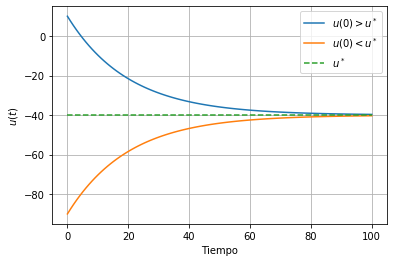

In [10]:
plt.figure(figsize=(6,4))
time = np.linspace(0,100,100)

def liafm_1 (u, t):
    return (20 + -60 - u)/20

Xs1 = scint.odeint(liafm_1, 10, time)
Xs2 = scint.odeint(liafm_1, -90, time)

plt.plot(time, Xs1, label='$u(0) > u^*$')
plt.plot(time, Xs2, label='$u(0) < u^*$')
plt.plot([0,100],[-40,-40], "--", label='$u^*$')
plt.xlabel('Tiempo')
plt.ylabel('$u(t)$')
plt.grid(True, which='both')
#plt.savefig('LIAFM_eq.png')
plt.legend()

### D.1.3 Solución general del modelo exponencial con $I(t) = I_0$

In [11]:
#Definición de funciones y de constantes
u = sp.Function('u')
I0, u0, tau, R, t, ur, Dt, theta_rh = sp.symbols('I_0 u_0 τ R t u_{rest} \Delta_T \ttheta_rh')
C1 = sp.symbols('C1')

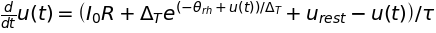

In [12]:
#Ecuación diferencial del modelo
eq2 = sp.Eq( u(t).diff(), (-(u(t) - ur) + I0*R + Dt*sp.exp((u(t)-theta_rh)/Dt))/tau)
eq2

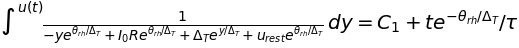

In [13]:
# Solución general de la ecuación diferencial del modelo lineal
solG = sp.dsolve(eq2)
solG

No se puede obtener la solución analítica, queda en función de una integral

### D.1.4 Análisis de estabilidad con $I(t) = 0$

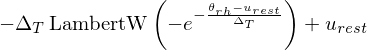

In [14]:
#Volvemos a plantear la derivada con I(t)=0 e intentamos resolver el valor de equilibrio analíticamente
du =  (-(u(t) - ur) + Dt*sp.exp((u(t)-theta_rh)/Dt))/tau
sp.solve(du, u(t))[0]

El resultado depende de una función no elemental LambertW. Se puede intentar obtener la solución por métodos analíticos pero para valores concretos de los parámetros

In [15]:
ur =5
Dt=1
theta_rh=9

# Asignamos valores a la derivada
du = -(u(t)-ur) + Dt*(sp.exp((u(t)-theta_rh)/Dt)) 
du

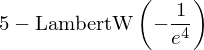

In [16]:
# Puntos de equilibrio
sp.solve(du, u(t))[0]

El resultado sigue dependiendo de una función no elemental por lo que hay que recurrir a métodos puramente analíticos

##### Estabilidad con $I(t) = 0$

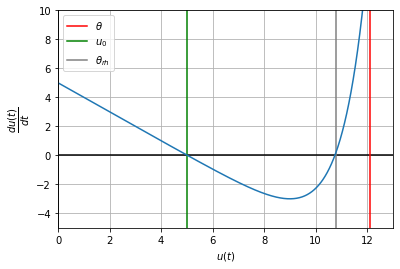

In [17]:
# Damos valores a u(t)
U=np.linspace(0,12,1000)

# Asignamos valores a las constantes 
ur =5
Dt=1
theta_rh=9
tau =1

# Asignamos valores a la derivada
du = -(U-ur) + Dt*(np.exp((U-theta_rh)/Dt))

# Añadimos la cuadricula
plt.grid(True, which='both')

# Marcamos los ejes de coordenadas
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')

# Dibujamos el umbral theta
plt.axvline(x=12.1, color='r', label='$θ$')

# Dibujamos el umbral reset
plt.axvline(x=5, color='g', label='$u_0$')

# Dibujamos el umbral de disparo 
plt.axvline(x=10.8, color='grey', label='$θ_{rh}$')

# Plot
plt.plot(U,du), plt.xlabel('$u(t)$'), plt.ylabel('$\dfrac{du(t)}{dt}$')

#Delimitamos la figura
plt.ylim(-5,10)
plt.xlim(0,13)
plt.legend()
#plt.savefig('NL-IAFM_1')

plt.show()

##### Estabilidad con $I(t)>0$

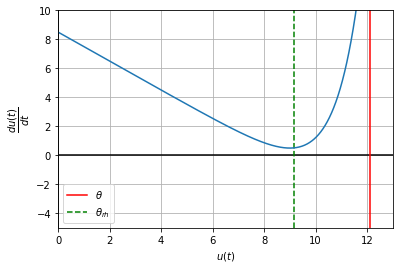

In [18]:
# Damos valores a u(t)
U=np.linspace(0,12,1000)

# Asignamos valores a las constantes 
ur =5
Dt=1
theta_rh=9
I0R=3.5
tau =1

# Asignamos valores a la derivada
du = -(U-ur) + Dt*(np.exp((U-theta_rh)/Dt)) + I0R

# Añadimos la cuadricula
plt.grid(True, which='both')

# Marcamos los ejes de coordenadas
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')

# Dibujamos el umbral theta
plt.axvline(x=12.1, color='r', label='$θ$')

# Dibujamos el umbral reset (Aproximado del 'umbral_3')
plt.axvline(x=(9.1629), color='green', label='$θ_{rh}$', linestyle='--')

# Plot
plt.plot(U,du), plt.xlabel('$u(t)$'), plt.ylabel('$\dfrac{du(t)}{dt}$')
plt.legend()

#Delimitamos la figura
plt.ylim(-5,10)
plt.xlim(0,13)
#plt.savefig('NL-IAFM_2')

plt.show()

# D.2 Modelo de FitzHugh-Nagumo

### D.2.1 Análisis de estabilidad

##### Puntos críticos

In [19]:
#Funciones y constantes
I = sp.Function('I')
v, w, t, a, b, c = sp.symbols('v w t a b c', positive=True)

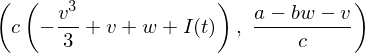

In [20]:
#Sistema de ecuaciones diferenciales
f = c*(w+v-(v**3)/3+I(t))
g = -(v-a+b*w)/c
f,g

No se puede hallar un expresión analítica de los puntos de equilibrio, pero corresponden a los puntos de cortes de las nuliclinas:

$c \big( w+v-\dfrac{v^3}{3}\big)=0 \hspace{0.5cm}\rightarrow\hspace{0.5cm} w = \dfrac{v^3}{3} -v$ 

$\dfrac{v -a +bw}{c}=0 \hspace{0.5cm} \rightarrow \hspace{0.5cm} w = \dfrac{a-v}{b}$

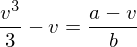

In [21]:
#Expresión de nuliclinas
pt = sp.Eq(v**3/3 -v,(a-v)/b)
pt

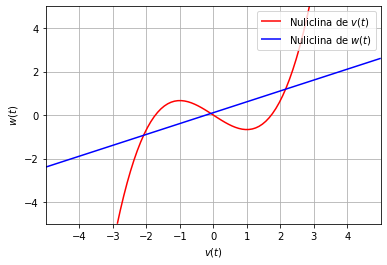

In [22]:
#Asignamos valores a los parámetros
par_a, par_b, par_c = -0.222,-2,3
pm = 100
#Creación de una malla de V y W sobre la cual se calculan los valores de las derivadas
V, W = np.meshgrid(np.linspace(-5, 5, pm),  np.linspace(-5, 5, pm))
X = par_c*(W+V-(V**3)/3)
Y = -(V-par_a+par_b*W)/par_c

#Se dibuja las curvas de nivel = 0
fig, ax = plt.subplots()
contour_v = ax.contour(V,W,X,[0], colors="red")
contour_w = ax.contour(V,W,Y,[0], colors="blue")

#Los handles se hacen para poder hacer una legenda con contour
handle_v,_ = contour_v.legend_elements()
handle_w,_ = contour_w.legend_elements()
plt.xlabel('$v(t)$')
plt.ylabel('$w(t)$')
ax.legend([handle_v[0], handle_w[0]],['Nuliclina de $v(t)$', 'Nuliclina de $w(t)$'])
ax.set_xticks([-4,-3,-2,-1,0,1,2,3,4])
plt.grid(True)
plt.show()
#fig.savefig('nullcline_intersect.png')

El corte de la nuliclina recta con la cúbica depende de los parámetros $a$ y $b$. Se puede calcular el número de puntos de equilibrio resultantes de un par de parámetros $(a,b)$ concretos sobre el mapa de parámetros. De esta forma se puede representar la zona de dicho mapa donde se cumplen las restricciones sobre los parámetros y comprobar que en esta zona solo hay puntos de equilibrio únicos

In [23]:
al = np.linspace(0.25,2,20)
bl = np.linspace(0,2,20)
AL, BL = np.meshgrid(al,bl)
result = np.zeros((20,20)) #Generamos el mapa de parámetros y un array result que almacena los resultados

for ai , av in enumerate(al):
    for bi, bv in enumerate(bl):
        result[ai,bi] = len(sp.solve(pt.subs({a:av, b:bv}))) #Para cada par (a,b) se resuelven los puntos de equilibrio y se almacena su cantidad en result

In [27]:
#Las zonas donde se cumplen las restricciones sobre los parámetros (a,b) quedan como True en el array correspondiente
X1 = np.where(BL < 1, True, False)
X2 = np.where(BL > 0, True, False)
Y1 = np.where(1-2*BL/3 < AL, True, False)
Y2 = np.where(AL < 1, True, False)

In [28]:
#Mediante ANDs se obtiene un array donde solo son True las posiciones donde todas las condiciones se cumplen
F = np.logical_and(X1,X2)
F = np.logical_and(F, Y1)
F = np.logical_and(F, Y2)

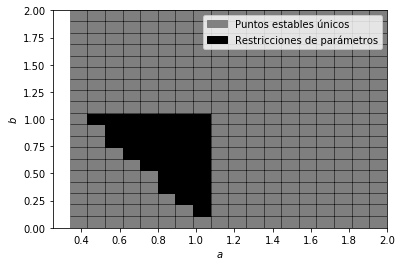

In [29]:
plt.pcolor(AL, BL, F, cmap='binary')
plt.pcolor(AL,BL,np.where(result==1,True,False), cmap='binary', alpha=0.5)
plt.xlabel('$a$')
plt.ylabel('$b$')

#Necesario para hacer la leyenda
grey_patch = mpatches.Patch(color='grey', label='Puntos estables únicos')
black_patch = mpatches.Patch(color='black', label='Restricciones de parámetros')
plt.legend(handles=[grey_patch, black_patch])
#plt.savefig('uniq_point_region')
plt.show()

La región del mapa de parámetros donde hay un solo punto de equilibrio está marcada en gris, al igual que la región donde se cumplen las restricciones. La zona donde solapan queda marcada en negro y se observa que la zona de restricciones está totalmente contenida en la de puntos únicos, de modo que siempre habrá un único punto de equilibrio

Ahora para comprobar que todos los puntos en la región de las restricciones se hallan en $v > 1$ usamos el mismo método representando si esto se cumple o no

In [30]:
al = np.linspace(0.3,2,20)
bl = np.linspace(0,2,20)
AL, BL = np.meshgrid(al,bl)
result = np.zeros((20,20)) #Generamos el mapa de parámetros y un array result que almacena los resultados

for ai , av in enumerate(al):
    for bi, bv in enumerate(bl):
        try:

            result[ai,bi] = sp.solve(pt.subs({a:av, b:bv}))[0].evalf() #Para cada par (a,b) se resuelven los puntos de equilibrio y evalua el valor de v*
        except:
            pass

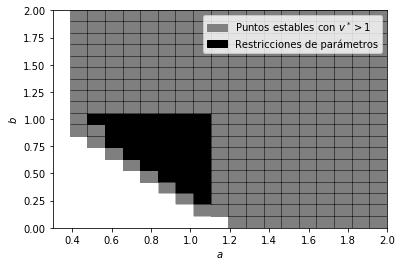

In [31]:
plt.pcolor(AL, BL, F, cmap='binary')
plt.pcolor(AL,BL,np.where(result>1,True,False), cmap='binary', alpha=0.5)
plt.xlabel('$a$')
plt.ylabel('$b$')
grey_patch = mpatches.Patch(color='grey', label='Puntos estables con $v^*>1$')
black_patch = mpatches.Patch(color='black', label='Restricciones de parámetros')
plt.legend(handles=[grey_patch, black_patch])
#plt.savefig('position_region')
plt.show()

De nuevo comprobamos que la región con las restricciones está totalmente contenida en la región de puntos para los cuales se cumple que $v^* >1$. En etapas posteriores del análisis se comprueba, a su vez, que debido a esto el punto es siempre estable

##### Matriz Jacobiana

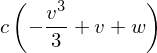

In [32]:
#Comprobación del equilibrio para I(t)=0
f = f.subs(I(t),0)
f

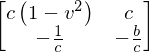

In [33]:
C = sp.Matrix([[f.diff(v), f.diff(w)],[g.diff(v), g.diff(w)]])
C

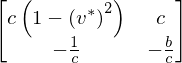

In [34]:
#La matriz evaluada en el punto de equilibrio es v* (no tenemos expresión analítica)
vs = sp.symbols('v^*')
C0 = C.subs(v,vs)
C0

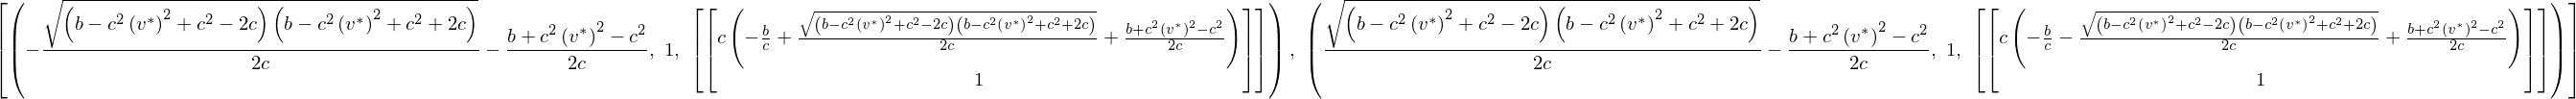

In [35]:
sp.simplify(C0.eigenvects())

Los autovalores tienen una expresión complicada de analizar. En su lugar se analiza la ecuación que los origina.

### D.2.2 Plano de fases

##### Direcciones + Órbitas

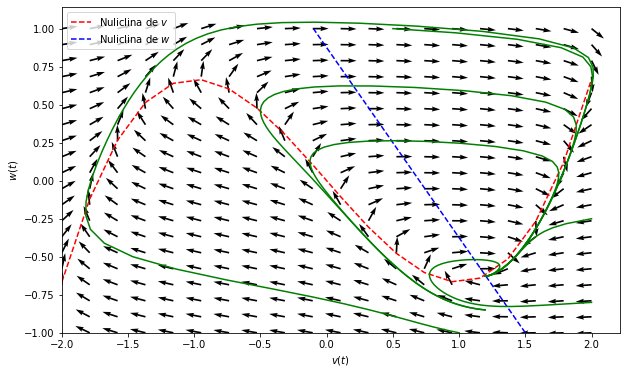

In [35]:
#Gráfica de órbitas desde distintos puntos de equilibrio para I(t) = 0

plt.figure(figsize=(10,6))
pm = 20
num_a, num_b, num_c = 0.7,0.8,3

V, W = np.meshgrid(np.linspace(-2, 2, pm),  np.linspace(-1, 1, pm)) 
X = num_c*(W+V-(V**3)/3)
Y = (num_a-num_b*W-V)/num_c
modulo2 = X**2 + Y**2
D1 = np.ones([pm, pm])
D2 = np.ones([pm, pm])
for i in range(pm):
    for j in range(pm):
        if modulo2[i, j] == 0:
            D1[i, j] = 0
            D2[i, j] = 0
        else:
            D1[i, j] = X[i, j]/np.sqrt(modulo2[i, j])
            D2[i, j] = Y[i, j]/np.sqrt(modulo2[i, j])
plt.quiver(V, W, D1, D2, angles = 'xy', scale = 35, headwidth = 3)
tiempo = np.linspace(0,20,200)
def F(X,t):
    return num_c*(X[1]+X[0]-(X[0]**3)/3), (num_a-num_b*X[1]-X[0])/num_c
for X0 in [[2,-0.8],[1,-1],[0.5,1],[2,-0.25],[1.1962,-0.85],[1.1963,-0.85]]:
    Xs = scint.odeint(F, X0, tiempo)
    plt.plot(Xs[:,0], Xs[:,1], "-", color="g")
cont1 = plt.contour(V,W,X,[0], linestyles="dashed",colors="red")
cont2 = plt.contour(V,W,Y,[0], linestyles="dashed",colors="blue")
h1,_ = cont1.legend_elements()
h2,_ = cont2.legend_elements()
plt.legend([h1[0],h2[0]],['Nuliclina de $v$','Nuliclina de $w$'])
plt.xlabel("$v(t)$")
plt.ylabel("$w(t)$")
#plt.savefig('FHM_PPnull')
plt.show()

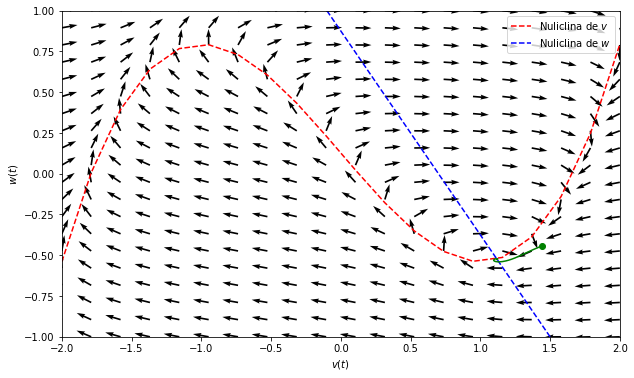

In [38]:
#Se introduce una I0 de baja intensidad

plt.figure(figsize=(10,6))
pm = 20
num_a, num_b, num_c, num_I = 0.7,0.8,3, -0.127

V, W = np.meshgrid(np.linspace(-2, 2, pm),  np.linspace(-1, 1, pm)) 
X = num_c*(W+V-(V**3)/3+num_I)
Y = (num_a-num_b*W-V)/num_c
modulo2 = X**2 + Y**2
D1 = np.ones([pm, pm])
D2 = np.ones([pm, pm])
for i in range(pm):
    for j in range(pm):
        if modulo2[i, j] == 0:
            D1[i, j] = 0
            D2[i, j] = 0
        else:
            D1[i, j] = X[i, j]/np.sqrt(modulo2[i, j])
            D2[i, j] = Y[i, j]/np.sqrt(modulo2[i, j])
plt.quiver(V, W, D1, D2, angles = 'xy', scale = 35, headwidth = 3)
tiempo = np.linspace(0,20,200)
def F(X,t):
    return num_c*(X[1]+X[0]-(X[0]**3)/3 + num_I), (num_a-num_b*X[1]-X[0])/num_c
for X0 in [[1.4422,-0.4422]]:
    Xs = scint.odeint(F, X0, tiempo)
    plt.plot(Xs[:,0], Xs[:,1], "-", color="g")
cont1 = plt.contour(V,W,X,[0], linestyles="dashed", colors="red")
cont2 = plt.contour(V,W,Y,[0], linestyles="dashed", colors="blue")
h1,_ = cont1.legend_elements()
h2,_ = cont2.legend_elements()
plt.legend([h1[0],h2[0]],['Nuliclina de $v$','Nuliclina de $w$'])

#El punto de equilibrio de la gráfica anterior es el punto de partida ahora que se introduce I0
plt.plot(1.4422,-0.4422, "o", color="g")
plt.xlabel("$v(t)$")
plt.ylabel("$w(t)$")
#plt.savefig('FHM_PPlow')
plt.show()

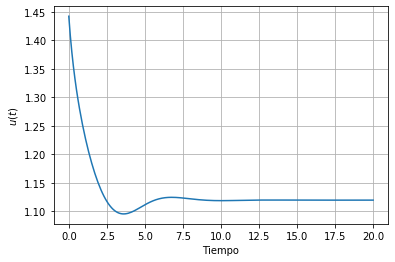

In [38]:
#Representación del potencial a lo largo de la órbita anterior

plt.plot(tiempo, Xs[:,0], "-")
plt.xlabel("Tiempo")
plt.ylabel("$u(t)$")
plt.grid(True)
#plt.savefig('FHN_low_pulse')
plt.show()

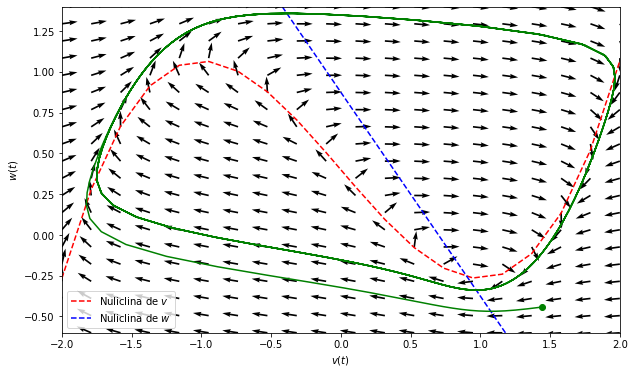

In [40]:
#Aplicando una I0 suficientemente elevada

plt.figure(figsize=(10,6))
pm = 20
num_a, num_b, num_c, num_I = 0.7,0.8,3,-0.4

V, W = np.meshgrid(np.linspace(-2, 2, pm),  np.linspace(-0.6, 1.4, pm)) 
X = num_c*(W+V-(V**3)/3+num_I)
Y = (num_a-num_b*W-V)/num_c
modulo2 = X**2 + Y**2
D1 = np.ones([pm, pm])
D2 = np.ones([pm, pm])
for i in range(pm):
    for j in range(pm):
        if modulo2[i, j] == 0:
            D1[i, j] = 0
            D2[i, j] = 0
        else:
            D1[i, j] = X[i, j]/np.sqrt(modulo2[i, j])
            D2[i, j] = Y[i, j]/np.sqrt(modulo2[i, j])
plt.quiver(V, W, D1, D2, angles = 'xy', scale = 35, headwidth = 3)
tiempo = np.linspace(0,50,500)
def F(X,t):
    return num_c*(X[1]+X[0]-(X[0]**3)/3 + num_I), (num_a-num_b*X[1]-X[0])/num_c
for X0 in [[1.4422,-0.4422]]:
    Xs = scint.odeint(F, X0, tiempo)
    plt.plot(Xs[:,0], Xs[:,1], "-", color="g")
cont1 = plt.contour(V,W,X,[0], linestyles="dashed", colors="red")
cont2 = plt.contour(V,W,Y,[0], linestyles="dashed", colors="blue")
h1,_ = cont1.legend_elements()
h2,_ = cont2.legend_elements()
plt.plot(1.4422,-0.4422, "o", color="g")
plt.legend([h1[0],h2[0]],['Nuliclina de $v$','Nuliclina de $w$'])
plt.xlabel("$v(t)$")
plt.ylabel("$w(t)$")
#plt.savefig('FHM_PPhigh')
plt.show()

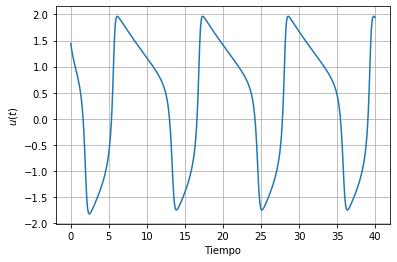

In [40]:
#Representación del potencial de la órbita anterior

plt.plot(tiempo[:400], Xs[:400,0], "-")
plt.xlabel("Tiempo")
plt.ylabel("$u(t)$")
plt.grid(True)
#plt.savefig('FHN_rep_pulse')
plt.show()

# D.3 Simulación neuronal

Código que implementa una serie de funciones que permiten simular el comportamiento de una neurona en función de la corriente $I(t)$ que se aplica. Además permite la obtención de una serie de gráficos estandarizados de los resultados

Este código implementa varios modelos de simulación neuronal:
    - Modelo de integración y disparo lineal
    - Modelo de integración y disparo exponencial
    - Modelo de Hodgkin y Huxley
    - Modelo de FitzHugh-Nagumo

### Modelos de simulación

Se definen una serie de funciones que permiten simular la neurona de acuerdo a los siguientes modelos

##### Linear Integrate-And-Fire Model

In [2]:
def LIAFM (u, i, constants, dt):
    '''
    Function for calculation of change of potential in a time interval
    
    Where:
        - u: membrane potential u(t) in a given instant
        - i: current applied to neuron in a given instant
        - constants: [R, u_rest, tau, theta, u_reset] list of constants
        - dt: time interval 
    
    Typical experimental values for this model: LIAFM(_, _, [1, -65, 5, 30, -70])
    '''
    R, u_rest, tau, theta, u_reset = constants
    
    #potential change du is calculated from the expression of the derivative
    du = ((R*i + u_rest - u)/(tau))*dt
    
    #u+du is the potential in the next time instant u(t+1). If it reaches the theta threshold
    #the value to which it is to be reset is returned instead
    if u+du >= theta:
        return u_reset
    #otherwise u+du is returned
    else:
        return u+du

##### Exponential Integrate-And-Fire Model

In [3]:
def EIAFM (u, i, constants, dt):
    '''
    Function for calculation of change of potential in a time interval
    
    Where:
        - u: membrane potential u(t) in a given instant
        - i: current applied to neuron in a given instant
        - constants: [R, u_rest, tau, Dt, theta_rh, theta, u_reset]
        - dt: time interval
    
    Typical experimental values for this model: EIAFM(_, _, [1, -65, 5, 3, 20, 30, -70])
    '''    
    R, u_rest, tau, Dt, theta_rh, theta, u_reset = constants
    
    #potential change du is calculated from the expression of the derivative
    du = ((-(u-u_rest) + R*i + Dt*np.exp((u-theta_rh)/Dt))/tau)*dt
    
    #u+du is the potential in the next time instant u(t+1). If it reaches the theta threshold
    #the value to which it is to be reset is returned instead
    if u+du >= theta:
        return u_reset
    #otherwise u+du is returned
    else:
        return u+du

##### Hodgkin and Huxley Model

In [4]:
def HH (variables, i, constants, dt):
    '''
    Function for calculation of change of H&H variables in a time interval
    
    Where:
        - variables: (u, n, m, h) tuple with variable values in a given instant
        - i: current applied to neuron in a given instant
        - constants: [g_k, E_k, g_na, E_na, g_l, E_l] list with constants
        - dt: time interval
    '''
    u, n, m, h = variables
    g_k, E_k, g_na, E_na, g_l, E_l, C = constants
    
    #change of variables is calculated from the expression of their derivatives
    alfa_n = (0.02*(u-25)/(1-np.exp(-(u-25)/9)))
    beta_n = (-0.002*(u-25)/(1-np.exp((u-25)/9)))
    alfa_m = (0.182*(u+35)/(1-np.exp(-(u+35)/9)))
    beta_m = (-0.124*(u+35)/(1-np.exp((u+35)/9)))
    alfa_h = (0.25*np.exp(-(u+90)/12))
    beta_h = (0.25*np.exp((u+62)/6)/np.exp((u+90)/12))
    
    du = (-(g_k*(n**4)*(u-E_k) + g_na*(m**3)*h*(u-E_na) + g_l*(u-E_l) -i)/C)*dt
    dn = (alfa_n*(1-n) - beta_n*n)*dt
    dm = (alfa_m*(1-m) - beta_m*m)*dt
    dh = (alfa_h*(1-h) - beta_h*h)*dt
    return u+du, n+dn, m+dm, h+dh

##### FitzHugh-Nagumo Model

In [5]:
def FN (variables, i, constants, dt):
    '''
    Function for calculation of change of F&N variables in a time-interval
    
    Where:
        - variables: (u, w) tuple with variable values in a given instant
        - i: current applied to neuron in a given instant
        - constants: [a, b, c] list with constants
    '''
    v, w = variables
    a, b, c = constants
    
    #change of variables is calculated from the expression of their derivatives
    dv = (c*(w+v-(v**3)/3 +i))*dt
    dw = ((a-b*w-v)/c)*dt
    return v+dv, w+dw

### Simulation function

Function that uses the auxiliary model functions to make a simulation of $u(t)$ over an $I(t)$ array

In [6]:
def IAF_simulate(u0, I, model, constants, dt):
    '''
    Function for simulation of membrane potential according to a current I(t) in IAF models
    
    Where:
        - u0: initial u(0) value
        - I: numpy array containing current values in each moment
        - model: LIAFM or EIAFM
        - constants: list of constants required by the model
        - dt: time interval
    '''
    #ut result array is initialized having same length as I(t)
    ut = np.zeros((len(I)))
    #u(t) value is initialized as u0
    u = u0
    
    #Each ut value is set as the u(t+dt) value predicted by the model function. 
    #This new value is set as the next u value
    for idx in range(len(I)):
        u =  model(u, I[idx], constants, dt)
        ut[idx] = u
        
    return ut

In [7]:
def multivar_simulate(initials, I, model, constants, dt):
    '''
    Function for simulation of membrane potential according to a current I(t) in HH and FN models
    
    Where:
        - initials: (u0, ...) tuple containing initial variable values
        - I: numpy array containing current values in each moment
        - constants: list of constants required by the model
    '''
    #simulation is an array[t, var] such  that there is a column for every variable in the system
    #and there is a row for each instant in time
    simulation = np.zeros((len(I), len(initials)))
    #The variable's values are initialized as the tuple of initial values
    variables = initials
    
    #Each simulation value is then set as the variables(t+dt) value predicted by the model function
    #This new tuple of values is set as the next variables values
    for idx in range(len(I)):
        variables = model(variables, I[idx], constants, dt)
        simulation[idx] = np.array(variables)
    
    return simulation

### Plotting function

Functions that make the plots of the corresponding simulations

In [8]:
def show_simulation(time, I, U, show_i = True, save=False):
    '''
    Function for plotting of I-t and V-t graphs
    
    Where:
        - time: time array such that I[i] = I(time[i])
        - I: current array
        - S: simulated U array 
    '''
    #Initialization of the whole figure
    
    if show_i: #if plotting intensity 
        figure = plt.figure(figsize=(6,7))
        grid_size = '21' #sets up grid of subplots to be 2 by 1

        #1st Subplot (u(t))
        position = grid_size + '1'
        axis1 = figure.add_subplot(position)
        
    else: #if not the subplot is added without position
        figure = plt.figure()
        axis1 = figure.add_subplot()
    axis1.plot(time, U)
    axis1.set(xlabel='Tiempo', ylabel='$u(t)$')
    plt.grid(True, which='both')
    
    if show_i:
        #2nd Subplot (I(t))
        position = grid_size + '2'
        axis2 = figure.add_subplot(position)
        axis2.plot(time, I)
        axis2.set(xlabel='Tiempo', ylabel='$I(t)$')
        plt.grid(True, which='both')
        #plt.ylim(0,500)
    
    if save:
        plt.savefig('simulation_figure')
    plt.show()

Es complicado generalizar la función para que pueda enseñar también las otras variables de los modelos HH y FN, pero se puede simplemente tomar el bloque de código de un plot y cambiar los parámetros.

### D.3.1 Testing

##### LIAFM

In [9]:
#Test time and I arrays are made
time = np.linspace(0,100,300)
I = np.zeros((300))
I[147:151] = 109
#Membrane potential is simulated
S = IAF_simulate(-65, I, LIAFM, [1, -65, 5, 28, -75], 2)
#Simulation is plotted

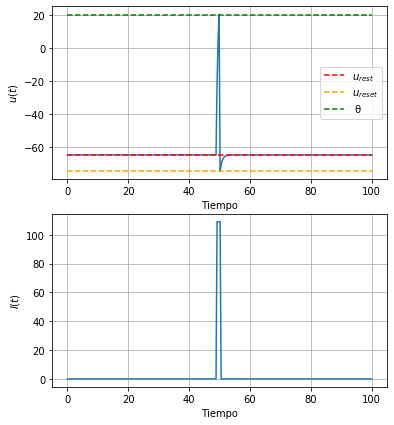

In [10]:
figure = plt.figure(figsize=(6,7))
grid_size = '21' #sets up grid of subplots to be 2 by 1

#1st Subplot (u(t))
position = grid_size + '1'
axis1 = figure.add_subplot(position)
axis1.plot(time, S)
axis1.set(xlabel='Tiempo', ylabel='$u(t)$')
plt.grid(True, which='both')
axis1.plot([0,100],[-65,-65], "-k", color="red", linestyle="--", linewidth=1.5, label = "$u_{rest}$")
axis1.plot([0,100],[-75,-75], "-k", color="orange", linestyle="--", linewidth=1.5, label = "$u_{reset}$")
axis1.plot([0,100],[20,20], "-k", color="green", linestyle="--", linewidth=1.5, label = " θ")
axis1.legend()

#2nd Subplot (I(t))
position = grid_size + '2'
axis2 = figure.add_subplot(position)
axis2.plot(time, I)
axis2.set(xlabel='Tiempo', ylabel='$I(t)$')

plt.grid(True, which='both')
#plt.savefig('LIAFM_spike')
plt.show()

##### EIAFM

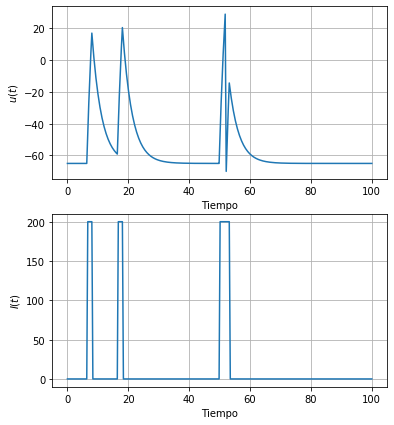

In [11]:
time = np.linspace(0,100,300)
I = np.zeros((300))
I[20:25] = I[50:55] = I[150:160] = 200
S = IAF_simulate(-65, I, EIAFM, [1, -65, 5, 3, 20, 30, -70], 0.5)
show_simulation(time, I, S)

##### HH

In [12]:
tiempo = np.linspace(0,100, 40000)
I = np.zeros((40000))
I[1000:3500] = np.ones((3500-1000))*200

In [13]:
simulation = multivar_simulate((-63 , 0.01, 0.1, 0.55), I, HH, [35,-77,40,55,0.3,-65, 1], 0.0003)

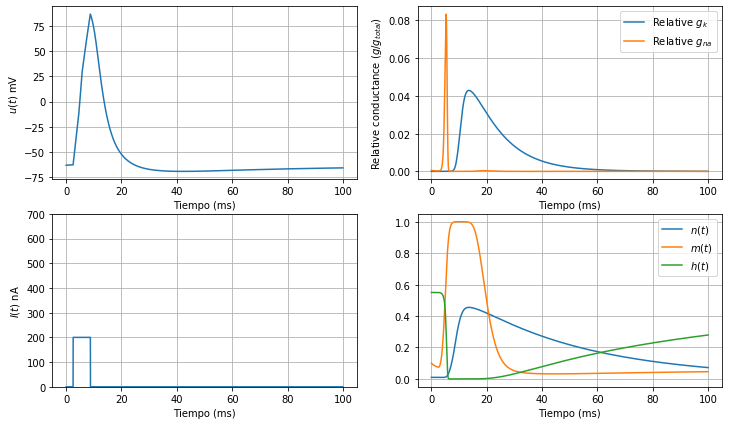

In [14]:
#Initialization of the whole figure
figure = plt.figure(figsize=(12,7))
grid_size = '22' #sets up grid of subplots to be 2 by 2

#1st Subplot (u(t))
position = grid_size + '1'
axis1 = figure.add_subplot(position)
axis1.plot(tiempo, simulation[:,0])
axis1.set(xlabel='Tiempo (ms)', ylabel='$u(t)$ mV')
plt.grid(True, which='both')


#2nd Subplot (Relative conductances (g/g_total))
position = grid_size + '2'
axis1 = figure.add_subplot(position)
axis1.plot(tiempo, simulation[:,1]**4, label='Relative $g_k$')
axis1.plot(tiempo, (simulation[:,2]**3)*simulation[:,3], label='Relative $g_{na}$')
axis1.set(xlabel='Tiempo (ms)', ylabel='Relative conductance ($g$/$g_{total}$)')
axis1.legend()
plt.grid(True, which='both')

#3rd Subplot (I(t))
position = grid_size + '3'
axis2 = figure.add_subplot(position)
axis2.plot(tiempo, I)
axis2.set(xlabel='Tiempo (ms)', ylabel='$I(t)$ nA')
plt.grid(True, which='both')
plt.ylim(0,700)

#4th Subplot (Ion channel coeficients n(t), m(t), h(t))
position = grid_size + '4'
axis3 = figure.add_subplot(position)
axis3.plot(tiempo, simulation[:,1], label='$n(t)$')
axis3.plot(tiempo, simulation[:,2], label='$m(t)$')
axis3.plot(tiempo, simulation[:,3], label='$h(t)$')
axis3.set(xlabel='Tiempo (ms)')
axis3.legend()

plt.grid(True, which='both')
#plt.savefig('HH_explanation')
plt.show()

##### FN

Single pulse

In [15]:
tiempo = np.linspace(0,100, 40000)
I = np.zeros((40000))
I[2000:] = -0.237

In [16]:
simulation = multivar_simulate((1.2, -0.625), I, FN, [0.7,0.8,4.2], 0.01)

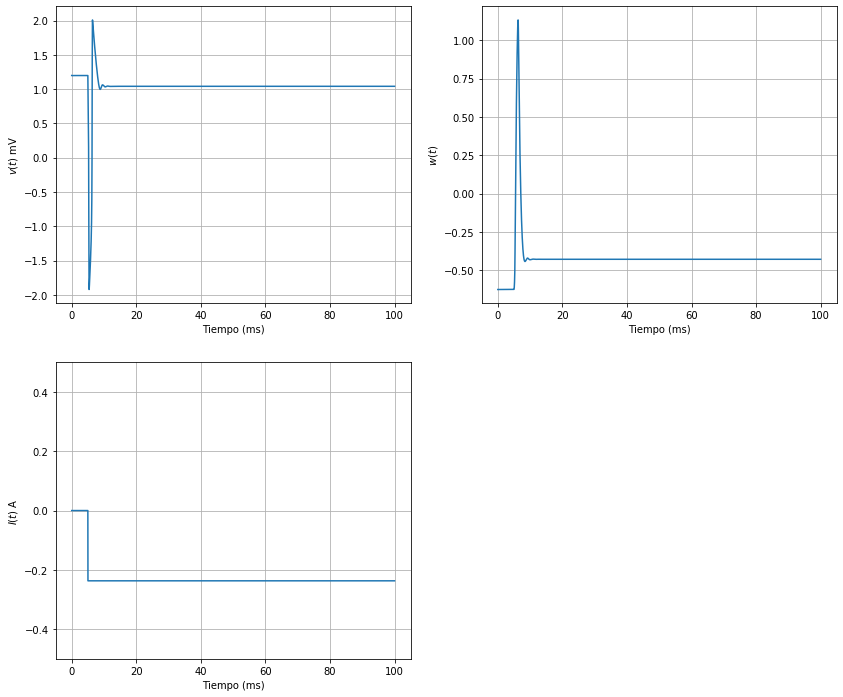

In [17]:
#Initialization of the whole figure
figure = plt.figure(figsize=(14,12))
grid_size = '22' #sets up grid of subplots to be 3 by 2

#1st Subplot (v(t))
position = grid_size + '1'
axis1 = figure.add_subplot(position)
axis1.plot(tiempo, simulation[:,0])
axis1.set(xlabel='Tiempo (ms)', ylabel='$v(t)$ mV')
plt.grid(True, which='both')

#2nd Subplot (w(t))
position = grid_size + '2'
axis1 = figure.add_subplot(position)
axis1.plot(tiempo, simulation[:,1])
axis1.set(xlabel='Tiempo (ms)', ylabel='$w(t)$')
plt.grid(True, which='both')

#3rd Subplot (I(t))
position = grid_size + '3'
axis2 = figure.add_subplot(position)
axis2.plot(tiempo, I)
axis2.set(xlabel='Tiempo (ms)', ylabel='$I(t)$ A')
plt.grid(True, which='both')
plt.ylim(-0.5,0.5)

plt.show()

Repetitive firing

In [18]:
tiempo = np.linspace(0,100,40000)
I = np.zeros((40000))
I[10000:30000] = -0.315

In [19]:
simulation = multivar_simulate((1.2, -0.625), I, FN, [0.7,0.8,4.2], 0.005)

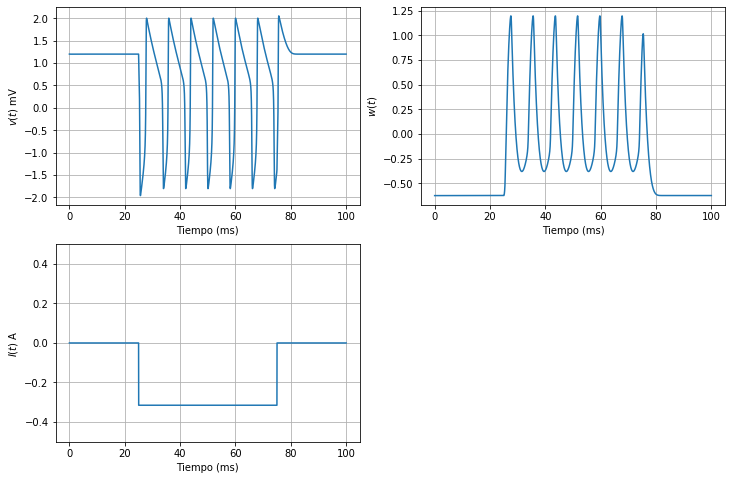

In [20]:
#Initialization of the whole figure
figure = plt.figure(figsize=(12,8))
grid_size = '22' #sets up grid of subplots to be 3 by 2

#1st Subplot (v(t))
position = grid_size + '1'
axis1 = figure.add_subplot(position)
axis1.plot(tiempo, simulation[:,0])
axis1.set(xlabel='Tiempo (ms)', ylabel='$v(t)$ mV')
plt.grid(True, which='both')

#2nd Subplot (w(t))
position = grid_size + '2'
axis1 = figure.add_subplot(position)
axis1.plot(tiempo, simulation[:,1])
axis1.set(xlabel='Tiempo (ms)', ylabel='$w(t)$')
plt.grid(True, which='both')

#3rd Subplot (I(t))
position = grid_size + '3'
axis2 = figure.add_subplot(position)
axis2.plot(tiempo, I)
axis2.set(xlabel='Tiempo (ms)', ylabel='$I(t)$ A')
plt.grid(True, which='both')
plt.ylim(-0.5,0.5)

#plt.savefig('FHN_rep_pulse')
plt.show()

### D.3.2 Ajuste a datos experimentales

##### Carga de los datos

Se cargaran unos datos de ajuste y unos datos de validación. Los datos de ajuste se usan para ajustar los parámetros del modelo y los de validación para comprobar el poder predictivo del modelo ajustado

In [21]:
import pickle as pkl
import gzip
#Modulos necesarios para importar los datos. Tuve que hacerlo así pues pyth2 fue necesario para extraerlos

In [22]:
#Bloque que permite la apertura de los datos
#IMPORTANTE en la carpeta donde esta el cuaderno debería haber una carpeta "experimental_data" con los datos
with open('experimental_data/tiempo.txt', 'rb') as f:
    u = pkl._Unpickler(f)
    u.encoding = 'latin1'
    tiempo= u.load()
    tiempo_ajuste = tiempo[:4000]
    tiempo_validacion = tiempo[5000:9000]

In [23]:
with open('experimental_data/current.txt', 'rb') as f:
    u = pkl._Unpickler(f)
    u.encoding = 'latin1'
    corriente = u.load()
    corriente_ajuste = corriente[:4000]
    corriente_validacion = corriente[5000:9000]

In [24]:
with open('experimental_data/volt.txt', 'rb') as f:
    u = pkl._Unpickler(f)
    u.encoding = 'latin1'
    voltaje = u.load()
    voltaje_ajuste = voltaje[:4000]
    voltaje_validacion = voltaje[5000:9000]

##### Datos experimentales de ajuste

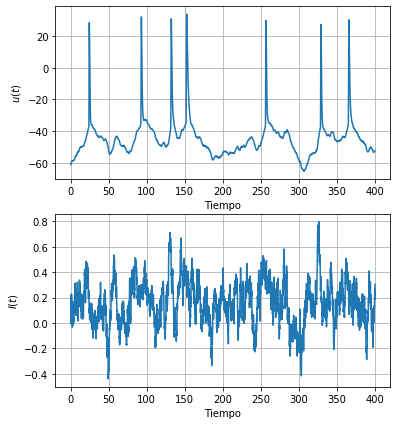

In [25]:
show_simulation(tiempo_ajuste, corriente_ajuste, voltaje_ajuste) #Uso la función show_simulation pero son los datos experimentales

##### Datos experimentales de validación

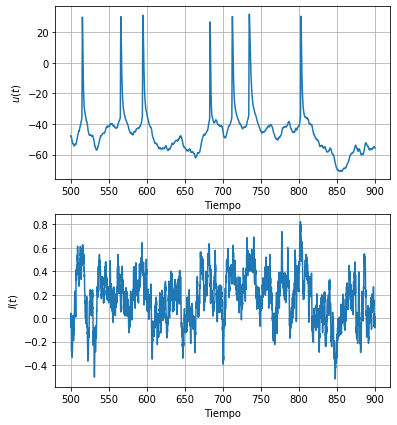

In [26]:
show_simulation(tiempo_validacion, corriente_validacion, voltaje_validacion) #Uso la función show_simulation pero son los datos experimentales

##### Simulación LIAFM

Se usa un método de scipy para el ajuste de datos. Para ello se debe ajustar los parámetros de la función du, que depende de los parámetros, a las diferencias de potencial encontradas en los datos experimentales

In [71]:
derivada = np.diff(voltaje_ajuste) #Saca las diferencias entre los datos del voltaje
inputs = np.vstack((voltaje[0:3999], corriente[0:3999])) #Forma un array con una columna de voltage y otra de corriente
inputs = inputs.transpose() #Para obtener las 2 columnas (el comando de antes deja como 2 filas)

In [72]:
def optim_LIAF(variables, R, u_rest, tau, theta, u_reset):
    u_array = variables[:,0]
    I_array = variables[:,1] #Se extraen los arrays de cada variable
    resultado = np.zeros((len(u_array)))
    for i in range(len(resultado)):
        du = (R*I_array[i] + u_rest - u_array[i])/tau
        #Si el du calculado causaría un disparo se añade el salto desde el valor de ahora hasta el reset
        if u_array[i]+du >= theta:
            resultado[i] = u_reset - u_array[i]
        else:
            resultado[i] = du
    return resultado

In [74]:
opt, cov = sciopt.curve_fit(optim_LIAF, inputs, derivada) #Función de optimización, con opt se extraen los parámetros
opt

array([283.10511694, -83.46022205, 294.55808301,   1.        ,
        18.06392017])

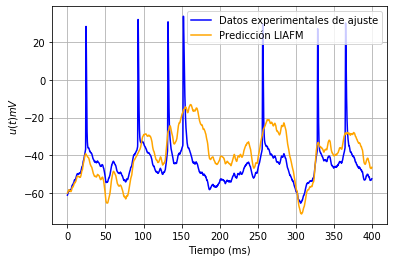

In [79]:
S = IAF_simulate(-60, corriente_ajuste, LIAFM, [283.10511694, -83.46022205, 294.55808301, 1.,18.06392017], 1)
 #Initialization of the whole figure
plt.plot(tiempo_ajuste, voltaje_ajuste, color='blue', label='Datos experimentales de ajuste')
plt.plot(tiempo_ajuste, S, color='orange', label='Predicción LIAFM')

plt.xlabel('Tiempo (ms)')
plt.ylabel('$u(t) mV$')
plt.grid(True, which='both')
plt.legend()
#plt.savefig('SIMajuste_liafm_scipy.png')
plt.show()

El resultado no es malo, se ajusta bastante al relieve de los datos pero no consigue reflejar los picos de potencial. Por un lado esto es complicado porque son puntos muy concretos a los que ajustar y por otro lado en este modelo tales picos son dificiles de conseguir

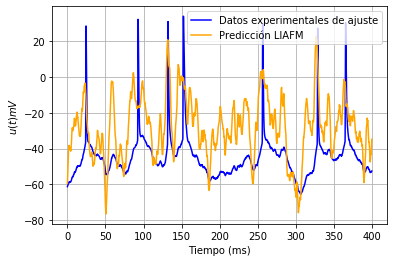

In [83]:
S = IAF_simulate(-60, corriente_ajuste, LIAFM, [128, -48, 21, 26, -32], 1)
 #Initialization of the whole figure
plt.plot(tiempo_ajuste, voltaje_ajuste, color='blue', label='Datos experimentales de ajuste')
plt.plot(tiempo_ajuste, S, color='orange', label='Predicción LIAFM')

plt.xlabel('Tiempo (ms)')
plt.ylabel('$u(t) mV$')
plt.grid(True, which='both')
plt.legend()
#plt.savefig('SIMajuste_liafm_byhand.png')
plt.show()

Un ajuste del modelo en base a el significado fisiológico de las constantes y con un poco de ajuste manual es capaz de predecir aproximadamente los picos de potencial (aunque no refleja adecuadamente el relieve)

##### Simulación EIAFM

En este modelo la generación de los picos es más sencilla, pero el método de scipy tampoco da buenos resultados a la hora de predecirlos

In [81]:
def optim_EIAFM (variables, R, u_rest, tau, Dt, theta_rh, theta, u_reset):
    u_array = variables[:,0]
    I_array = variables[:,1] #Se extraen los arrays de cada variable
    resultado = np.zeros((len(u_array)))
    for i in range(len(resultado)):
        du = (R*I_array[i] + u_rest - u_array[i] + Dt*np.exp((u_array[i]-theta_rh)/Dt))/tau
        #Si el du calculado causaría un disparo se añade el salto desde el valor de ahora hasta el reset
        if u_array[i]+du >= theta:
            resultado[i] = u_reset - u_array[i]
        else:
            resultado[i] = du
    return resultado

In [82]:
opt, cov = sciopt.curve_fit(optim_EIAFM, inputs, derivada) #Función de optimización, con opt se extraen los parámetros
opt

array([ 1.76256727e+00, -3.79514679e+03,  1.81906959e+00,  3.77728496e+03,
       -1.75119787e+01,  1.00000000e+00,  1.80639202e+01])

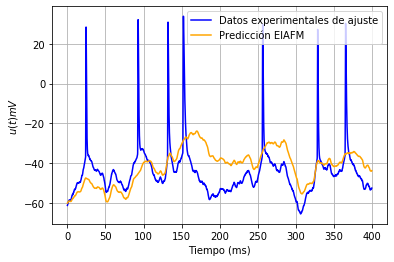

In [84]:
S = IAF_simulate(-60, corriente_ajuste, EIAFM, [1.76256727e+00, -3.79514679e+03,  1.81906959e+00,  3.77728496e+03,
       -1.75119787e+01,  1.00000000e+00,  1.80639202e+01], 0.5)
 #Initialization of the whole figure
plt.plot(tiempo_ajuste, voltaje_ajuste, color='blue', label='Datos experimentales de ajuste')
plt.plot(tiempo_ajuste, S, color='orange', label='Predicción EIAFM')

plt.xlabel('Tiempo (ms)')
plt.ylabel('$u(t) mV$')
plt.grid(True, which='both')
plt.legend()
#plt.savefig('SIMajuste_eiafm_scipy.png')
plt.show()

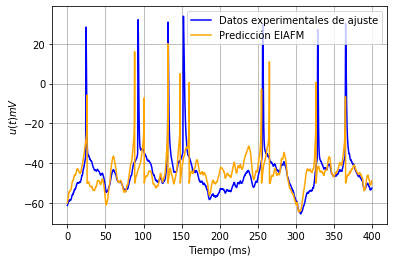

In [85]:
S = IAF_simulate(-60, corriente_ajuste, EIAFM, [65, -55, 25, 5, -38, 22, -50], 0.5)
 #Initialization of the whole figure
plt.plot(tiempo_ajuste, voltaje_ajuste, color='blue', label='Datos experimentales de ajuste')
plt.plot(tiempo_ajuste, S, color='orange', label='Predicción EIAFM')

plt.xlabel('Tiempo (ms)')
plt.ylabel('$u(t) mV$')
plt.grid(True, which='both')
plt.legend()
#plt.savefig('SIMajuste_eiafm_byhand.png')
plt.show()

En este caso, sin embargo, el ajuste en base a las características fisiológicas y al ajuste manual da mejores resultados y se obtiene un ajuste bastante acertado

##### Simulación HH

Los modelos más avanzados como HH son capaces de simular mejor el comportamiento real. 

Su optimización por un lado podría ser más sencilla ya que no hay un salto instantáneo del potencial al cruzar un determinado umbral. Por otro lado, es necesario simular 4 variables (u, n, m y h), pero no se disponen de los datos experimentales de las últimas 3

Así, no se puede efectuar el ajuste de los datos usando métodos estandarizados y es necesario recurrir a programas específicos

Sin embargo, un intento de modelar estos datos utilizando las constantes estándar de este modelo da una curva que refleja de forma significativa los datos reales pero que está desplazada y escalada respecto de los mismos (y debido a esto no presenta los picos). Se intentó modificar a mano los parámetros de modo que se solventaran estas diferencias pero no se consiguió (en este caso las constantes no tienen valores fisiológicos tan claros)

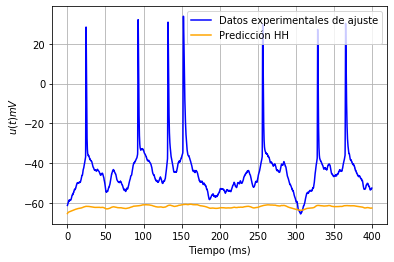

In [104]:
S = multivar_simulate((-65.5 , 0.01, 0.1, 0.55), corriente_ajuste, HH, [35,-77,40,55,0.3,-65, 1],  0.06)
#Initialization of the whole figure
plt.plot(tiempo_ajuste, voltaje_ajuste, color='blue', label='Datos experimentales de ajuste')
plt.plot(tiempo_ajuste, S[:,0], color='orange', label='Predicción HH')

plt.xlabel('Tiempo (ms)')
plt.ylabel('$u(t) mV$')
plt.grid(True, which='both')
plt.legend()
#plt.savefig('SIMajuste_hh_real.png')
plt.show()

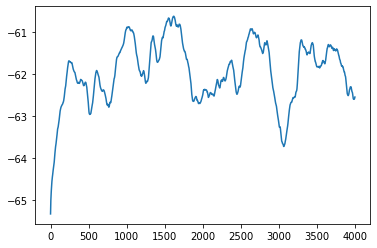

In [105]:
plt.plot(S[:,0])

Los datos comparados en la misma gráfica aparentemente no coinciden debido a que la escala impide ver sus similitudes. Si se observa únicamente la simulación se puede apreciar como pese a la escala los picos coinciden en cierta medida

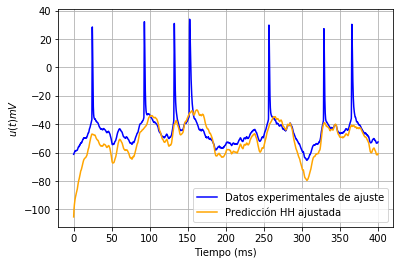

In [120]:
S = multivar_simulate((-65.5 , 0.01, 0.1, 0.55), corriente_ajuste, HH, [35,-77,40,55,0.3,-65, 1],  0.06)
#Initialization of the whole figure
plt.plot(tiempo_ajuste, voltaje_ajuste, color='blue', label='Datos experimentales de ajuste')
plt.plot(tiempo_ajuste, S[:,0]*16+940, color='orange', label='Predicción HH ajustada')

plt.xlabel('Tiempo (ms)')
plt.ylabel('$u(t) mV$')
plt.grid(True, which='both')
plt.legend()
#plt.savefig('SIMajuste_hh_adjusted')
plt.show()

La curva se desplaza y reescala manualmente para que coincida con los datos experimentales. Se consigue replicar de forma inexacta la mayoría de los picos que se producen

##### Validación de datos

Se escogen para la validación de los datos:

1. Ajuste de LIAFM por scipy
2. Ajuste de EIAFM manual

El modelo HH se descarta ya que requiere modificaciones para que coincida con los datos

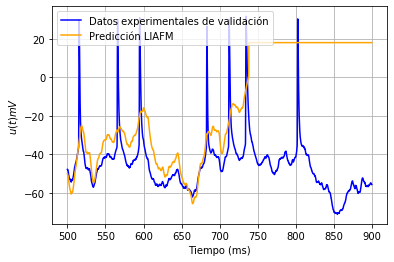

In [122]:
S = IAF_simulate(-50, corriente_validacion, LIAFM, [283.10511694, -83.46022205, 294.55808301, 1.,18.06392017], 1)
 #Initialization of the whole figure
plt.plot(tiempo_validacion, voltaje_validacion, color='blue', label='Datos experimentales de validación')
plt.plot(tiempo_validacion, S, color='orange', label='Predicción LIAFM')

plt.xlabel('Tiempo (ms)')
plt.ylabel('$u(t) mV$')
plt.grid(True, which='both')
plt.legend()
#plt.savefig('SIMvalid_liafm_scipy.png')
plt.show()

En la parte inicial coincide bien con el modelo aunque luego pierde la relación

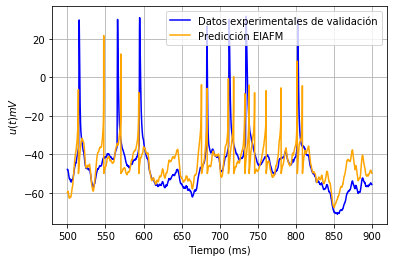

In [123]:
S = IAF_simulate(-60, corriente_validacion, EIAFM, [65, -55, 25, 5, -38, 22, -50], 0.5)
 #Initialization of the whole figure
plt.plot(tiempo_validacion, voltaje_validacion, color='blue', label='Datos experimentales de validación')
plt.plot(tiempo_validacion, S, color='orange', label='Predicción EIAFM')

plt.xlabel('Tiempo (ms)')
plt.ylabel('$u(t) mV$')
plt.grid(True, which='both')
plt.legend()
#plt.savefig('SIMvalid_eiafm_byhand.png')
plt.show()

Aunque hay 2 picos extra y varios en los que se producen más picos de lo debido, el modelo se ajusta muy bien durante todo el recorrido